## Loading data and packages

In [1]:
import pandas as pd # 0.25.1
import numpy as np # 1.18.5
import matplotlib.pyplot as plt # 3.2.2
import seaborn as sns # 0.10.1
# sklearn 0.23.1
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_column', 100)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [4]:
train.shape

(595212, 59)

In [5]:
train.drop_duplicates()
train.shape

(595212, 59)

In [6]:
test.shape

(892816, 58)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

## Metadata

In [8]:
data = []
for f in train.columns:
    # Defining the role
    if f =='target':
        role = 'target'
    elif f =='id':
        role = 'id'
    else:
        role = 'input'
    
    # Defining the level
    if 'bin' in f or f =='target':
        level = 'binary'
    elif 'cat' in f or f =='id':
        level = 'nominal'
    elif train[f].dtype == int:
        level = 'ordinal'
    else:
        level = 'interval'
        
    keep = True
    if f == 'id':
        keep = False
    
    dtype = train[f].dtype
    
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)

meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


예시 두가지

In [10]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [12]:
pd.DataFrame({'count': meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


## Descriptive Statistics
### Interval Variables

In [13]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


### Ordinal Variables

In [14]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


## Handling Imbalanced Classes
언더 샘플링

In [15]:
desired_apriori = 0.1

# target의 인덱스
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# target당 갯수
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# 언더샘플링 비율 및 target=0의 갯수
undersampling_rate = ((1-desired_apriori) * nb_1) / (nb_0 * desired_apriori)
undersampled_nb_0 = int(undersampling_rate * nb_0)
print(f'target=0일때 언더 샘플링 비율: {undersampling_rate}')
print(f'target=0일때 언더 샘플링 된 갯수: {undersampled_nb_0}')

# 랜덤으로 target=0 추출
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# 리스트 재설정
idx_list = list(undersampled_idx) + list(idx_1)

# 언더 샘플링된 데이터 프레임 리턴
train = train.loc[idx_list].reset_index(drop=True)

target=0일때 언더 샘플링 비율: 0.34043569687437886
target=0일때 언더 샘플링 된 갯수: 195246


## Data Quaility Checks
### Checking Missing Values

In [16]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f]==-1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings / train.shape[0]
        
        print(f'변수 {f} 는 {missings} 개의 결측값을 가지고 있고, 비율은 {missings_perc:.2f} 이다.')
print(f'전체 결측값 칼럼 갯수: {len(vars_with_missing)}')

변수 ps_ind_02_cat 는 103 개의 결측값을 가지고 있고, 비율은 0.00 이다.
변수 ps_ind_04_cat 는 51 개의 결측값을 가지고 있고, 비율은 0.00 이다.
변수 ps_ind_05_cat 는 2256 개의 결측값을 가지고 있고, 비율은 0.01 이다.
변수 ps_reg_03 는 38580 개의 결측값을 가지고 있고, 비율은 0.18 이다.
변수 ps_car_01_cat 는 62 개의 결측값을 가지고 있고, 비율은 0.00 이다.
변수 ps_car_02_cat 는 2 개의 결측값을 가지고 있고, 비율은 0.00 이다.
변수 ps_car_03_cat 는 148367 개의 결측값을 가지고 있고, 비율은 0.68 이다.
변수 ps_car_05_cat 는 96026 개의 결측값을 가지고 있고, 비율은 0.44 이다.
변수 ps_car_07_cat 는 4431 개의 결측값을 가지고 있고, 비율은 0.02 이다.
변수 ps_car_09_cat 는 230 개의 결측값을 가지고 있고, 비율은 0.00 이다.
변수 ps_car_11 는 1 개의 결측값을 가지고 있고, 비율은 0.00 이다.
변수 ps_car_14 는 15726 개의 결측값을 가지고 있고, 비율은 0.07 이다.
전체 결측값 칼럼 갯수: 12


- ps_car_03_cat 과 ps_car_05_cat은 너무 높은 비중의 결측값이 있으므로 제거한다.
- 카테고리형 변수의 결측값은 -1로 남겨둔다.
- ps_reg_03(countinuous)는 약 18%의 결측값이 있으므로 평균으로 대체한다.
- ps_car_11(ordinal)은 1개의 결측값을 가지고 있으므로 최빈값으로 대체한다.
- ps_car_14(countinuous)는 약 7%의 결측값이 있으므로 평균으로 대체한다.

In [17]:
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, axis=1, inplace=True)

# 메타 데이터 업데이트
meta.loc[(vars_to_drop), 'keep'] = False

# 평균, 최빈값 대체
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

### Checking the cardinality of the categorical variables
카테고리형 변수로 더미 변수를 생성하기 전에 각 카테고리 변수에 몇 개의 값들이 있는지 알아보자.

In [18]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print(f'변수 {f} 는 {dist_values} 개의 값을 가지고 있다.')

변수 ps_ind_02_cat 는 5 개의 값을 가지고 있다.
변수 ps_ind_04_cat 는 3 개의 값을 가지고 있다.
변수 ps_ind_05_cat 는 8 개의 값을 가지고 있다.
변수 ps_car_01_cat 는 13 개의 값을 가지고 있다.
변수 ps_car_02_cat 는 3 개의 값을 가지고 있다.
변수 ps_car_04_cat 는 10 개의 값을 가지고 있다.
변수 ps_car_06_cat 는 18 개의 값을 가지고 있다.
변수 ps_car_07_cat 는 3 개의 값을 가지고 있다.
변수 ps_car_08_cat 는 2 개의 값을 가지고 있다.
변수 ps_car_09_cat 는 6 개의 값을 가지고 있다.
변수 ps_car_10_cat 는 3 개의 값을 가지고 있다.
변수 ps_car_11_cat 는 104 개의 값을 가지고 있다.


In [19]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, tst_series=None, target=None, min_samples_leaf=1, smoothing=1, noise_level=0):
    '''
    trn_series: train의 카테고리 피쳐(pd.Series)
    tst_series: test의 카테고리 피쳐(pd.Series)
    target: target 데이터(pd.Series)
    min_samples_leaf(int): 카테고리 평균을 고려할 최소 샘플 수
    smoothing(int): 범주형 평균과 이전의 평균의 균형을 유지하는 평활 효과
    '''
    # assert: 가정설정문, 어떤 조건을 테스트하는 디버깅 보조 도구
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # target 평균 계산
    averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean', 'count'])
    # smoothing 계산
    smoothing = 1 / (1 + np.exp(-(averages['count'] - min_samples_leaf) / smoothing))
    # 모든 target에 평균 적용
    prior = target.mean()
    # count가 클수록 full_avg가 적게 고려된다.
    averages[target.name] = prior * (1 - smoothing) + averages['mean'] * smoothing
    averages.drop(['mean', 'count'], axis=1, inplace=True)
    # trn에 평균 적용 및 인덱스 복구
    ft_trn_series = pd.merge(trn_series.to_frame(trn_series.name),
                            averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
                            on=trn_series.name,
                            how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    ft_trn_series.index = trn_series.index
    # tst에 평균 적용 및 인덱스 복구
    ft_tst_series = pd.merge(tst_series.to_frame(tst_series.name),
                            averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
                            on=tst_series.name,
                            how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    ft_tst_series.index = tst_series.index
    
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [20]:
train_encoded, test_encoded = target_encode(train['ps_car_11_cat'],
                                           test['ps_car_11_cat'],
                                           target=train.target,
                                           min_samples_leaf=100,
                                           smoothing=10,
                                           noise_level=0.01)
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat', 'keep'] = False
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

## Exploratory Data Visualization
### Categorical Variables
카테고리형 변수와 target이 1인 고객의 분포를 확인해보자.

<Figure size 432x288 with 0 Axes>

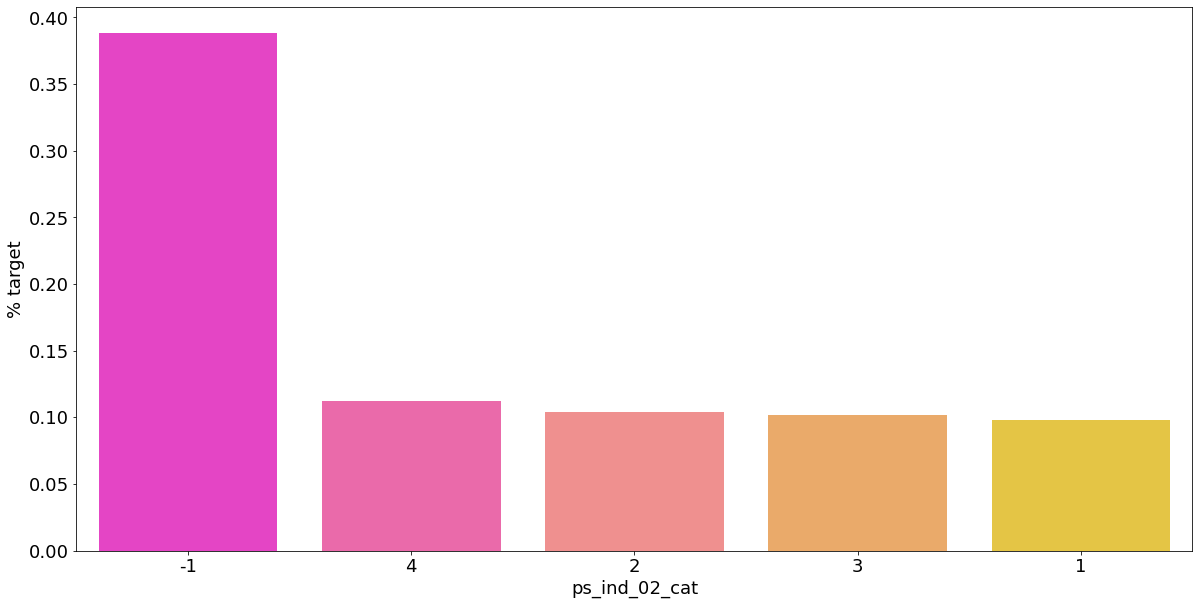

<Figure size 432x288 with 0 Axes>

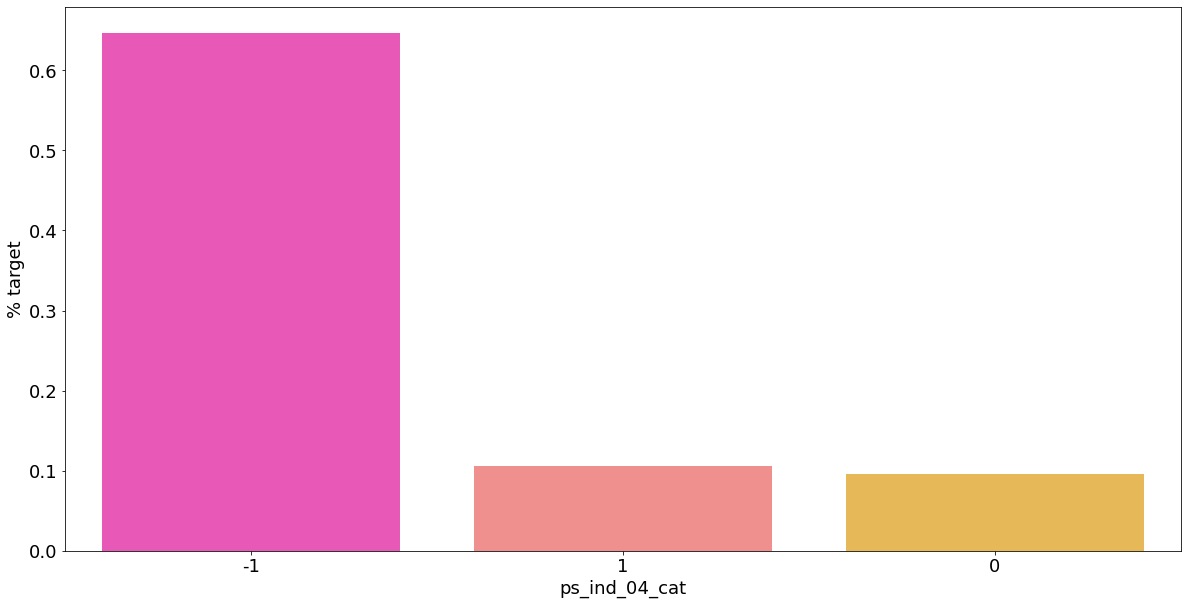

<Figure size 432x288 with 0 Axes>

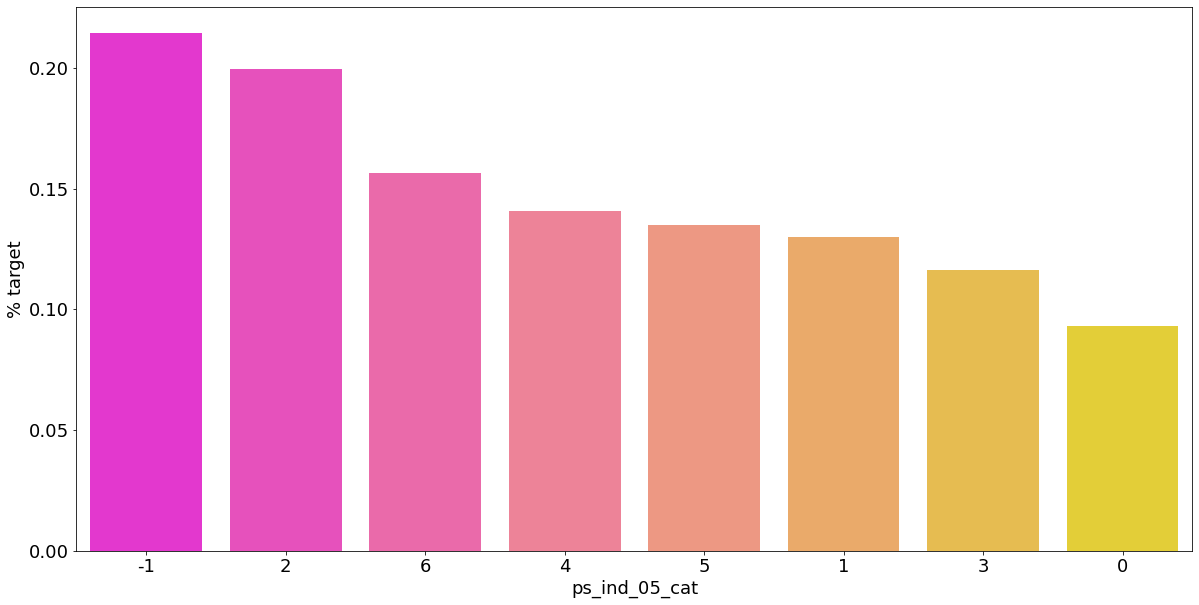

<Figure size 432x288 with 0 Axes>

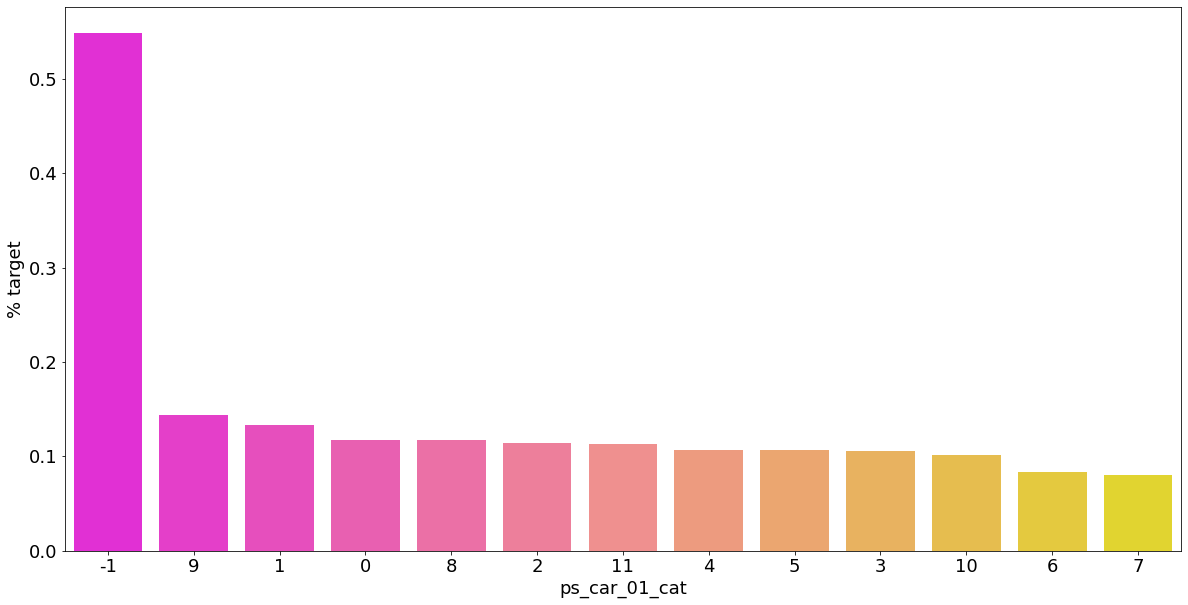

<Figure size 432x288 with 0 Axes>

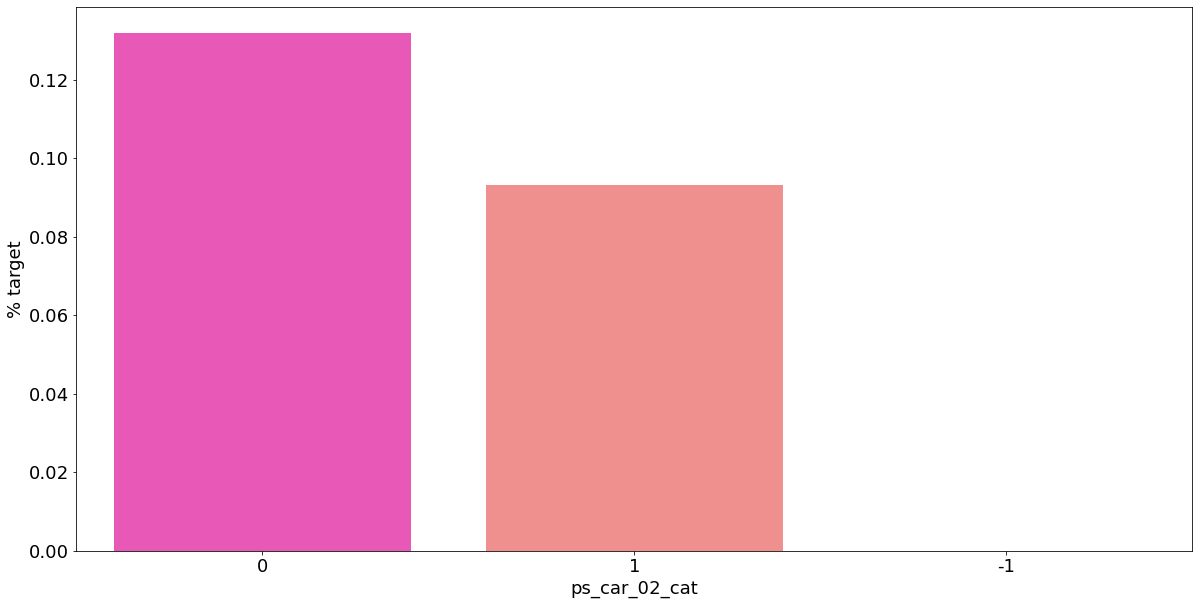

<Figure size 432x288 with 0 Axes>

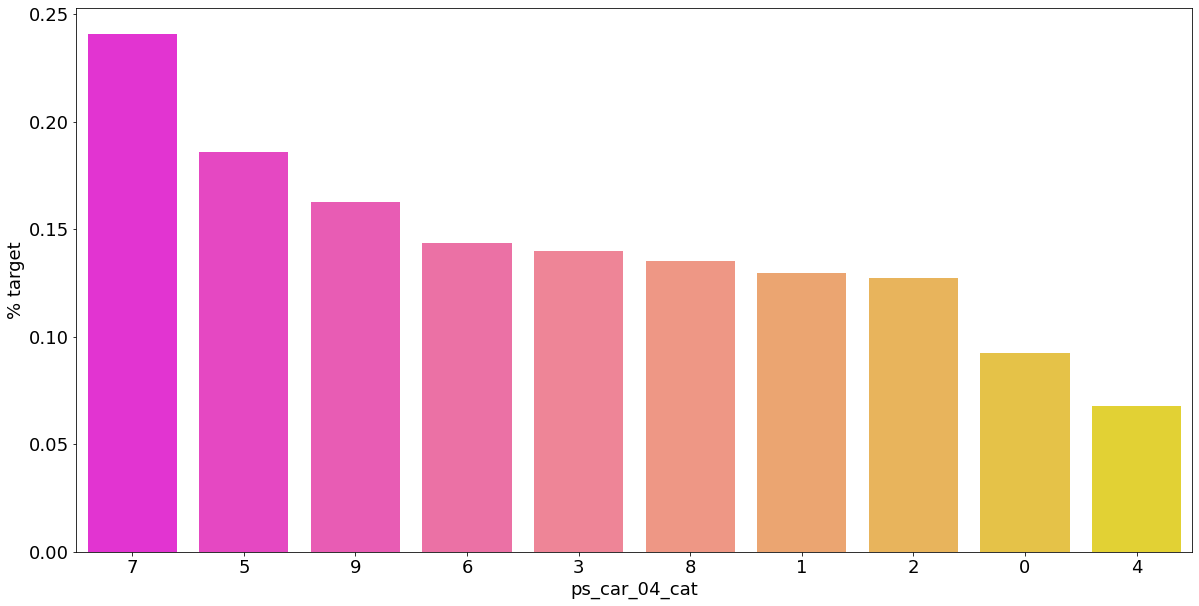

<Figure size 432x288 with 0 Axes>

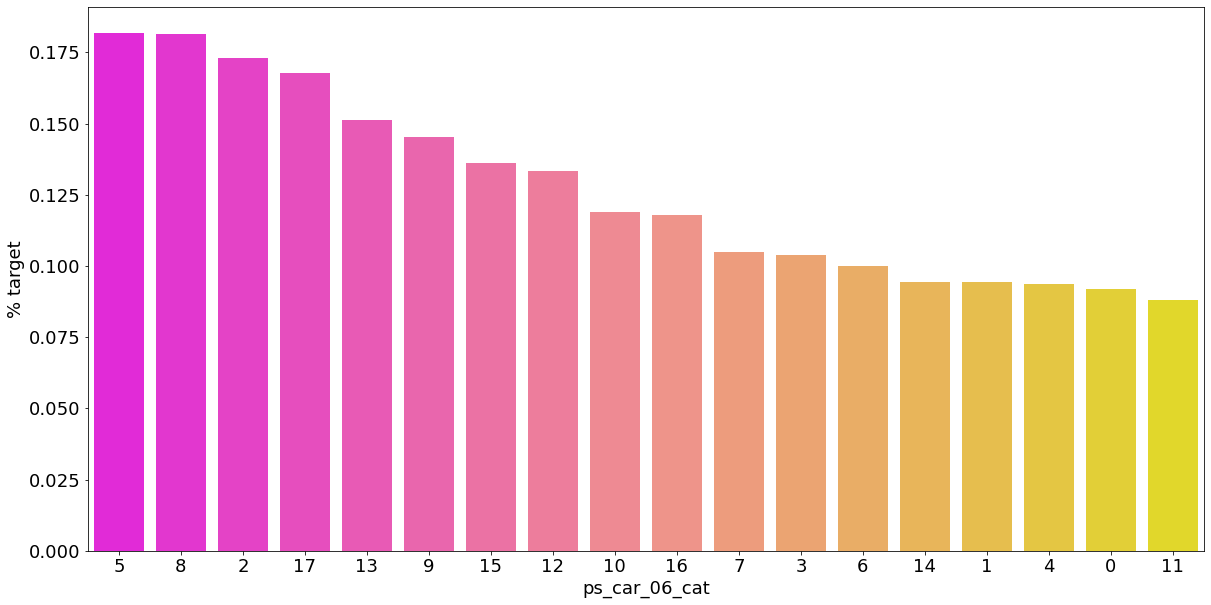

<Figure size 432x288 with 0 Axes>

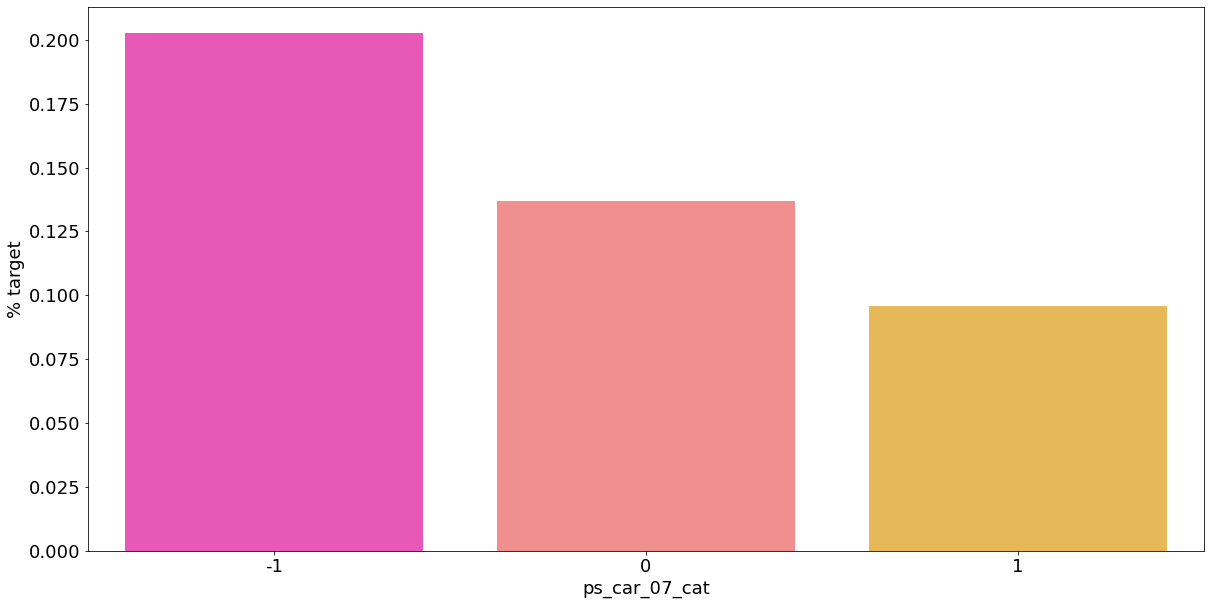

<Figure size 432x288 with 0 Axes>

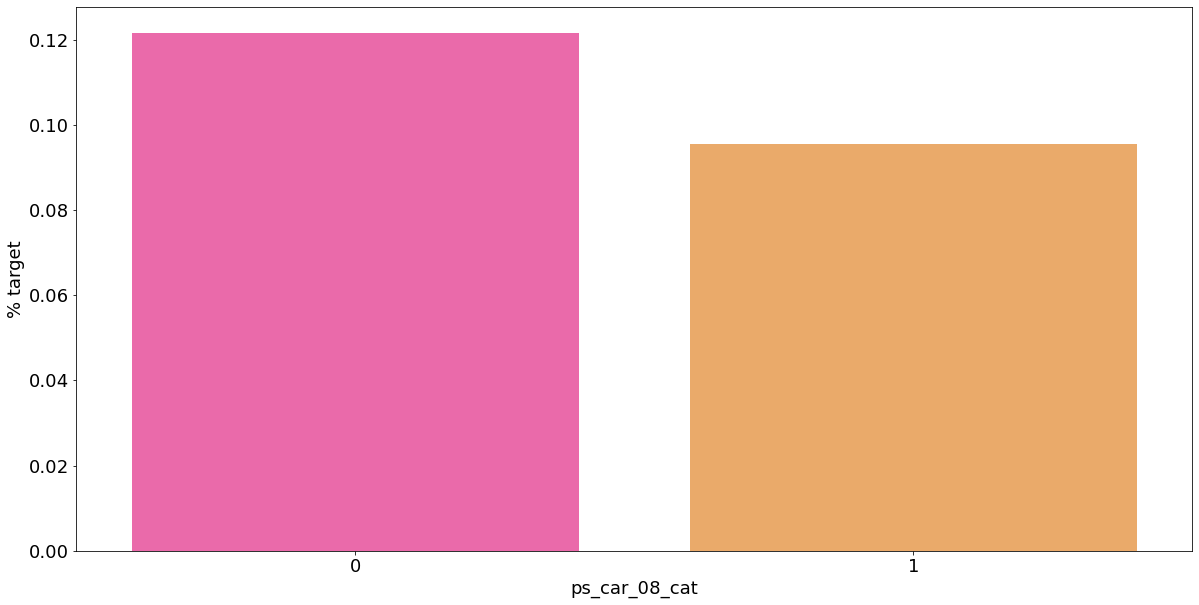

<Figure size 432x288 with 0 Axes>

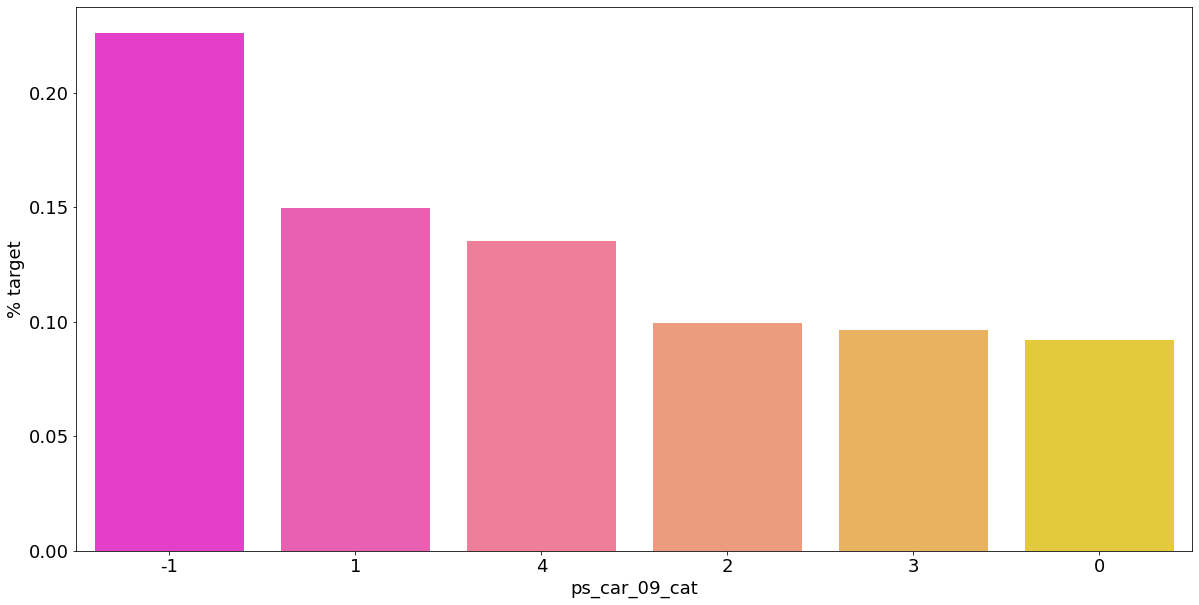

<Figure size 432x288 with 0 Axes>

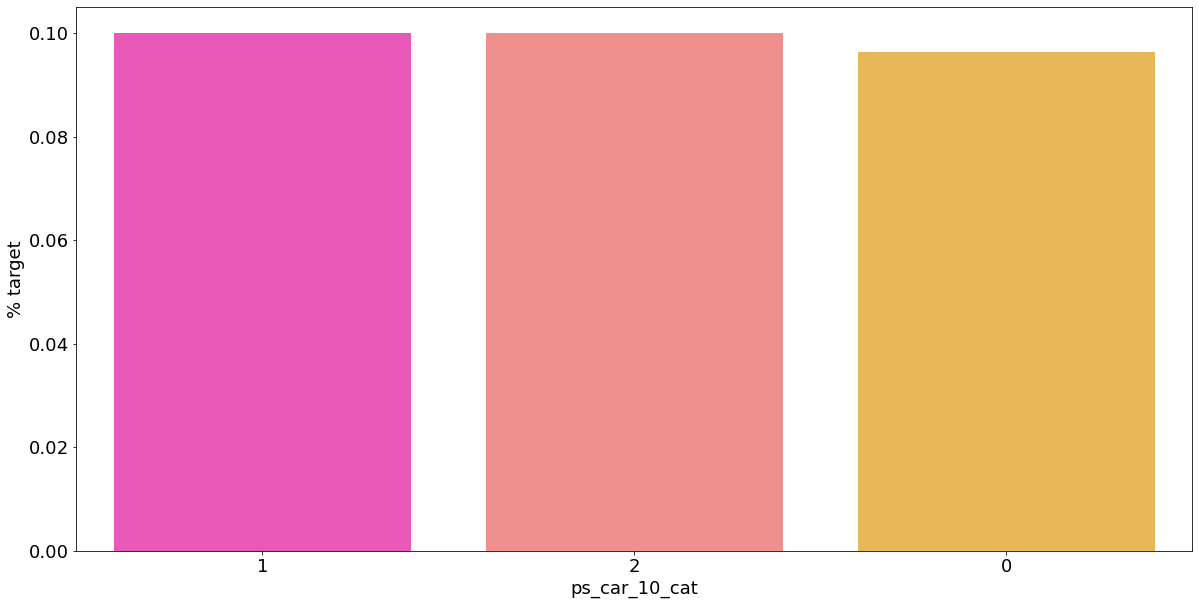

In [22]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20, 10))
    cat_perc = train[[f, 'target']].groupby([f], as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    sns.barplot(f, 'target', data=cat_perc, ax=ax, order=cat_perc[f], palette='spring')
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)

### Interval Variables
간격 변수들의 상관 관계를 알아보자. 아래 코드는 [an example by Michael Waskom](http://seaborn.pydata.org/examples/many_pairwise_correlations.html)에 기반하여 작성하였다.

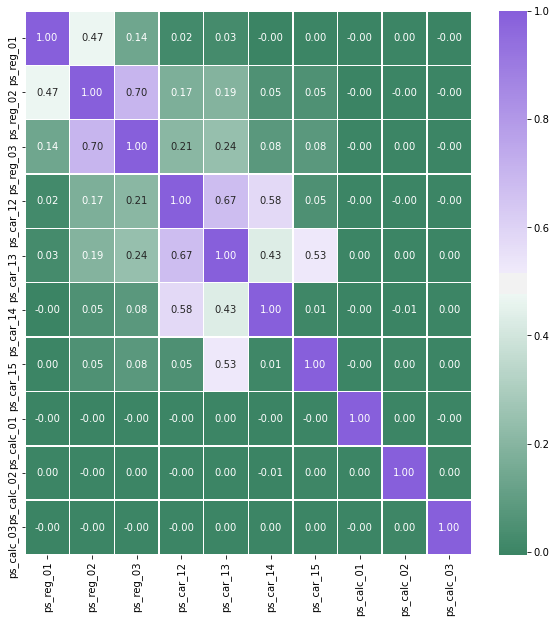

In [26]:
def corr_heatmap(v):
    correlations = train[v].corr()
    
    cmap = sns.diverging_palette(150, 275, as_cmap=True)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(correlations, cmap=cmap, fmt='.2f', linewidths=.5, annot=True)

v = meta[(meta.level == 'interval') & meta.keep].index
corr_heatmap(v)

높은 상관관계를 가진 변수들:

- ps_reg_02 와 ps_reg_03 (0.70)
- ps_car_12 와 ps_car_13 (0.67)
- ps_car_12 와 ps_car_14 (0.58)
- ps_car_13 과 ps_car_15 (0.53)

In [27]:
s = train.sample(frac=0.1)

#### ps_reg_02 and ps_reg_03
아래 회귀 직선을 확인하면 피쳐들이 선형 관계가 있다는 것을 알 수 있고, *hue* 로 회귀 직선이 target=0 일 때와 1일 때를 볼 수 있다.


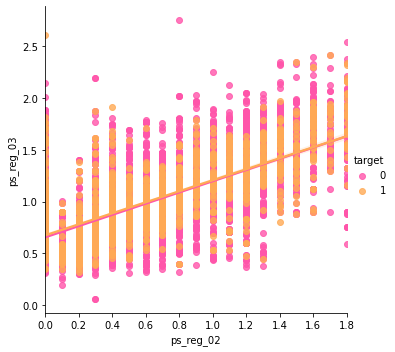

In [28]:
sns.lmplot('ps_reg_02', 'ps_reg_03', data=s, hue='target', palette='spring')

#### ps_car_12 and ps_car_13

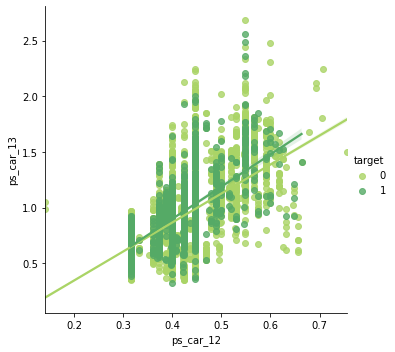

In [29]:
sns.lmplot('ps_car_12', 'ps_car_13', data=s, hue='target', palette='summer_r')

#### ps_car_12 and ps_car_14

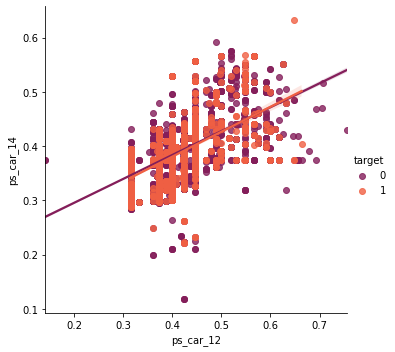

In [32]:
sns.lmplot('ps_car_12', 'ps_car_14', hue='target', data=s, palette='rocket')

#### ps_car_13 and ps_car_15

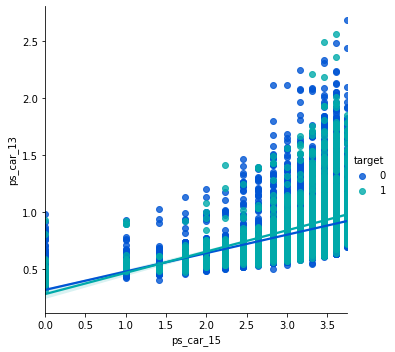

In [34]:
sns.lmplot('ps_car_15', 'ps_car_13', data=s, hue='target', palette='winter')

### Checking the Correlations between Ordinal Variables

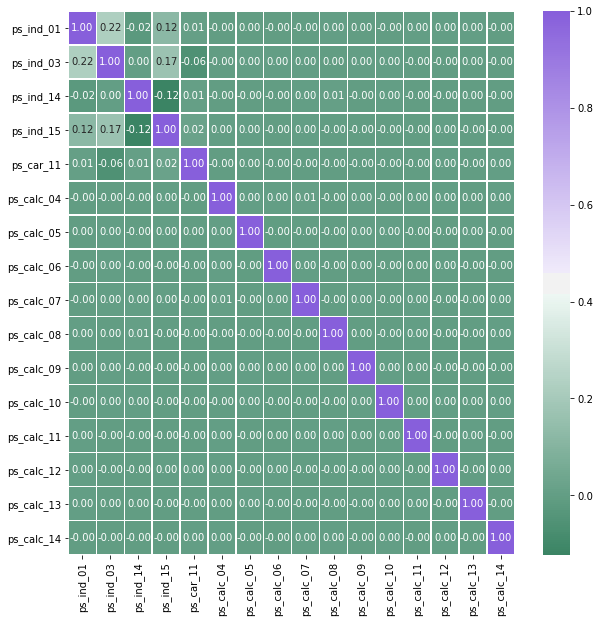

In [35]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

## Feature Engineering
### Creating Dummy Variables
카테고리형 변수에서 1과 2는 값이 두 배임을 의미하진 않는다. 그러므로 더미형 변수를 만들어줘야 한다. 첫 번째 더미 변수를 삭제하는 이유는 원래 변수의 범주에 대해 생성된 다른 더미 변수에서 파생될 수 있기 때문이다.

In [36]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print(f'더미화 전에 존재하는 변수의 갯수: {train.shape[1]}')
train = pd.get_dummies(train, columns=v, drop_first=True)
print(f'더미화 후에 존재하는 변수의 갯수: {train.shape[1]}')

더미화 전에 존재하는 변수의 갯수: 57
더미화 후에 존재하는 변수의 갯수: 109


### Creating interaction variables
PolynomialFeatures함수는 데이터를 다항식 형태로 변경한다. 

- degree: 차수를 조절
- include_bias: True로 할 경우 0차항(1)도 만듦.
- interaction_only: 교호작용을 할 변수만 만들지 여부를 결정.

In [37]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True)
train=pd.concat([train, interactions], axis=1)
print(f'교호작용 후 존재하는 변수의 갯수: {train.shape[1]}')

교호작용 후 존재하는 변수의 갯수: 164


## Feature Selection
### Removing Features with low or zero variance
분산이 없거나 매우 낮은 피쳐를 제거할 수 있는데, sklearn의 **VarianceThreshold** 를 이용해서 제거할 수 있다. 기본적으로는 분산이 0인 피쳐를 제거하는데 이전 단계에서 분산이 0인 변수가 없었으므로, 1%미만인 피쳐를 제거하게 설정할 수 있다.  

Vectorize는 매트릭스 구조의 데이터의 연산을 일괄적으로 처리할 수 있도록 Series, DataFrame, array 등과 같이 시퀀스형 자료를 함수의 매개변수로 포함시킬 수 있게 하는 것을 말한다.

In [39]:
selector = VarianceThreshold(threshold=0.01)
selector.fit(train.drop(['id', 'target'], axis=1))
f = np.vectorize(lambda x: not x)
# get_support()는 선택된 특성을 boolean 값으로 표시해 어떤 특성이 선택되었는지 확인 가능
v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print(f'{len(v)} 개의 변수가 너무 낮은 분산을 가짐')
print(f'변수 리스트:\n{list(v)}')

28 개의 변수가 너무 낮은 분산을 가짐
변수 리스트:
['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


만약 분산을 바탕으로 선택을 하면 많은 변수가 없어질 수 있다. 그러나 우리가 지금 변수를 많이 갖고있기에 분류기가 선택하도록 하자. sklearn의 **SelectFromModel** 메서드를 사용하면 최상의 피쳐를 선택하게 할 수 있다. 아래에서 랜덤 포레스트를 통해 방법을 설명한다.

### Selecting Features with a Random Forest and SelectFromModel

랜덤 포레스트의 **feature importances** 를 이용해서 선택하도록 하자. **SelectFromModel** 로 유지할 변수의 수를 지정할 수 있고, feature importances에 대한 임곗값을 수동으로 설정할 수 있다. 여기선 간단하게 상위 50%만을 설정한다.  

이 코드는 [GitHub repo of Sebastian Raschka](https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch04/ch04.ipynb) 에서 참고했다.

In [42]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_11_cat_te               0.021195
 2) ps_car_13                      0.017340
 3) ps_car_12 ps_car_13            0.017244
 4) ps_car_13^2                    0.017224
 5) ps_car_13 ps_car_14            0.017179
 6) ps_reg_03 ps_car_13            0.017111
 7) ps_reg_01 ps_car_13            0.016829
 8) ps_car_13 ps_car_15            0.016812
 9) ps_reg_03 ps_car_14            0.016292
10) ps_reg_03 ps_car_12            0.015539
11) ps_reg_03 ps_car_15            0.015166
12) ps_car_14 ps_car_15            0.015021
13) ps_car_13 ps_calc_01           0.014772
14) ps_reg_02 ps_car_13            0.014693
15) ps_reg_01 ps_reg_03            0.014659
16) ps_car_13 ps_calc_03           0.014643
17) ps_car_13 ps_calc_02           0.014642
18) ps_reg_01 ps_car_14            0.014356
19) ps_reg_03                      0.014263
20) ps_reg_03^2                    0.014177
21) ps_reg_03 ps_calc_03           0.013801
22) ps_reg_03 ps_calc_02           0.013713
23) ps_car_14 ps_calc_02        

In [43]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print(f'셀렉션 전 피쳐: {X_train.shape[1]}')
n_features = sfm.transform(X_train).shape[1]
print(f'셀렉션 후 피쳐: {n_features}')
selected_vars = list(feat_labels[sfm.get_support()])

셀렉션 전 피쳐: 162
셀렉션 후 피쳐: 81


In [44]:
train = train[selected_vars + ['target']]

## Feature Scaling
앞서 언급한 것과 같이 train 세트에 standard scaling을 할 수 있고, 이는 몇몇 분류기의 성능을 향상시킬 수 있다.

In [45]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])